# Data Science Internship Project - CodeSoft
##    Task 2 : Movie Rating Prediction

## 1. Importing Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

## 2. Loading the Dataset

In [71]:
Movie_file_path = "C:/Users/hp/Desktop/IMDb Movies India.csv"
df = pd.read_csv(Movie_file_path , encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [72]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [73]:
df.shape

(15509, 10)

## 3. Data Cleaning and Preprocessing 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [75]:
df.duplicated().sum()

np.int64(6)

In [76]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [77]:
df.drop_duplicates(inplace=True)

In [78]:
df.dropna(inplace=True)

In [79]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [80]:
df.shape

(5659, 10)

In [81]:
df['Votes'] = df['Votes'].replace({r'\$': '', r',': '', r'M': '000000', r'K': '000'}, regex=True)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce') 

In [82]:
df['Duration'] = df['Duration'].astype(str)  
df['Duration'] = df['Duration'].str.extract(r'(\d+)')  
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')  

In [83]:
df['Year'] = df['Year'].astype(str).str.replace(r'[()]', '', regex=True).astype(int)

In [84]:
df.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [85]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [86]:
df.nunique()

Name        5385
Year          91
Duration     174
Genre        376
Rating        83
Votes       2027
Director    2431
Actor 1     1960
Actor 2     2321
Actor 3     2556
dtype: int64

## 4. Exploratory Data Analysis (EDA)

In [87]:
df.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


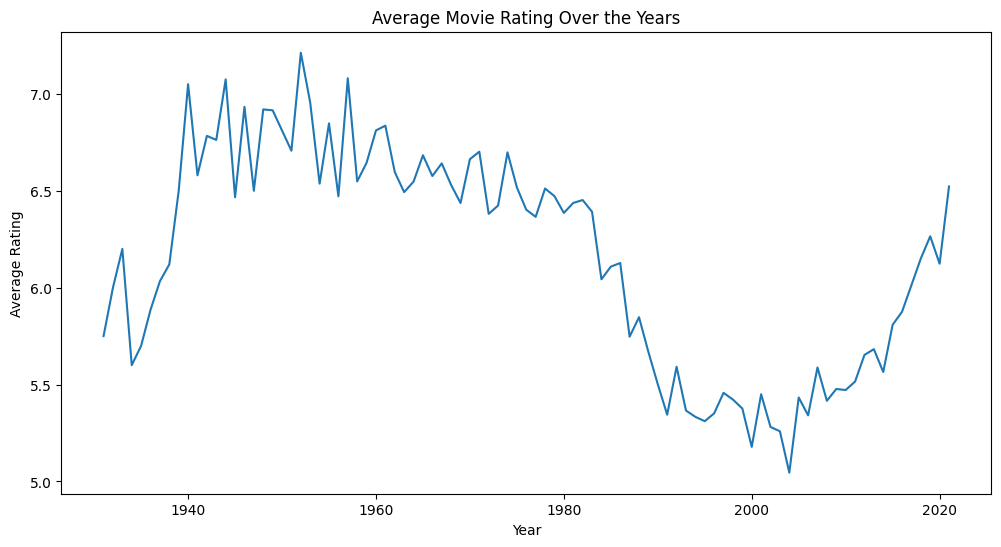

In [88]:

yearly_rating = df.groupby('Year')['Rating'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_rating.index, y=yearly_rating.values)
plt.title('Average Movie Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


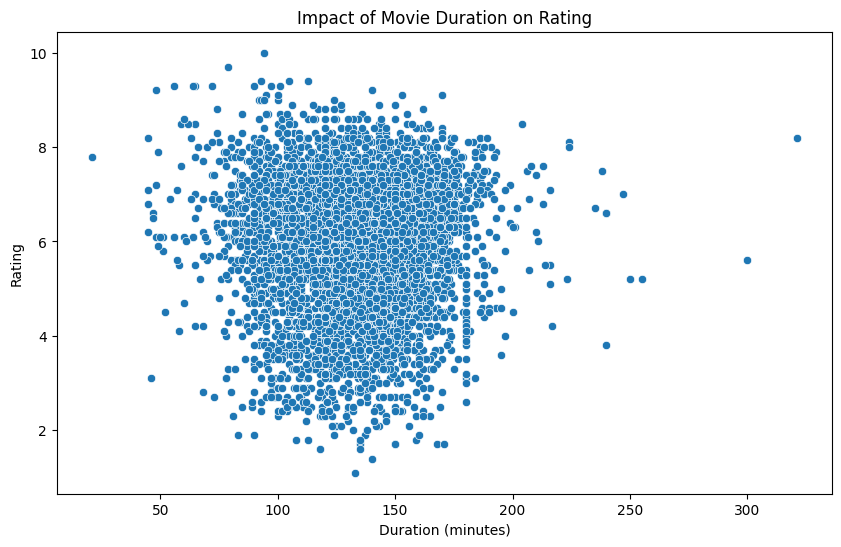

In [89]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=df)
plt.title('Impact of Movie Duration on Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

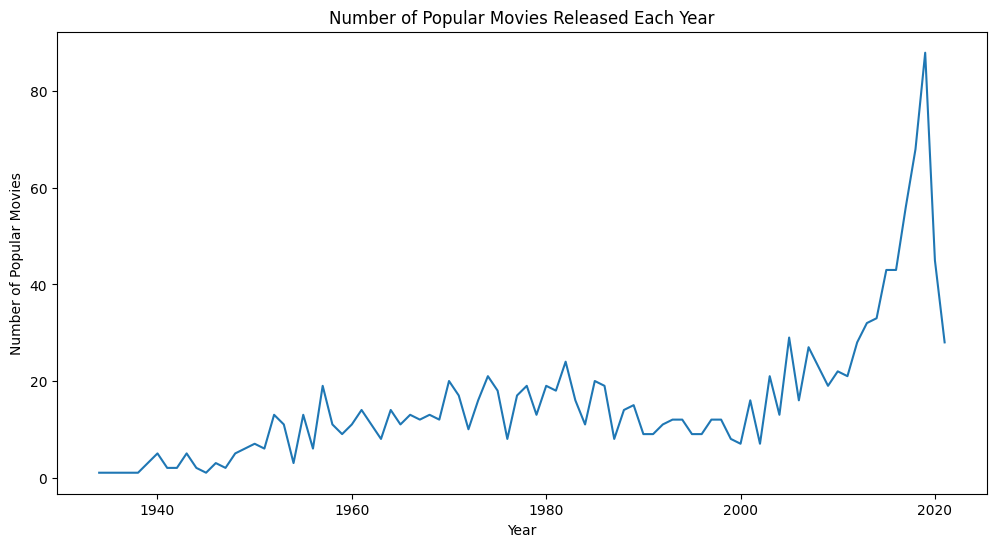

In [90]:

popular_movies = df[df['Rating'] >= 7]
popular_movies_count = popular_movies.groupby('Year').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=popular_movies_count.index, y=popular_movies_count.values)
plt.title('Number of Popular Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Popular Movies')
plt.show()


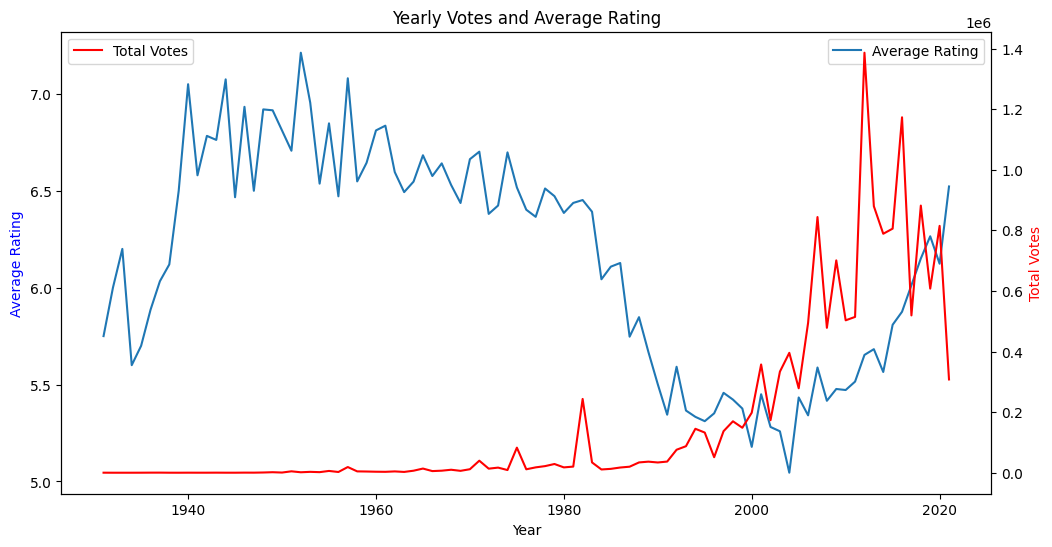

In [91]:
 

yearly_votes_rating = df.groupby('Year').agg({'Votes': 'sum', 'Rating': 'mean'}).reset_index()


fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x='Year', y='Rating', data=yearly_votes_rating, ax=ax1, label='Average Rating')
ax1.set_ylabel('Average Rating', color='b')

ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Votes', data=yearly_votes_rating, ax=ax2, color='r', label='Total Votes')
ax2.set_ylabel('Total Votes', color='r')

plt.title('Yearly Votes and Average Rating')
plt.show()


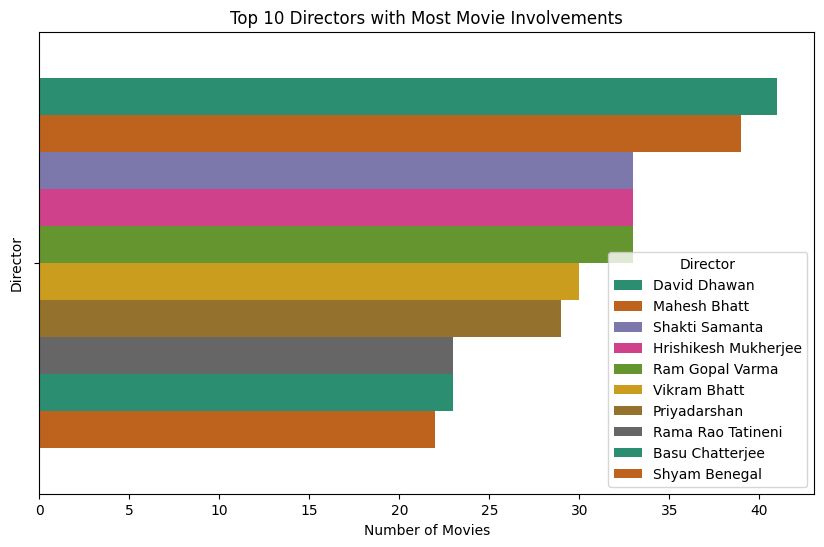

In [92]:
 
director_movie_count = df['Director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=director_movie_count.values, hue=director_movie_count.index, palette='Dark2')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


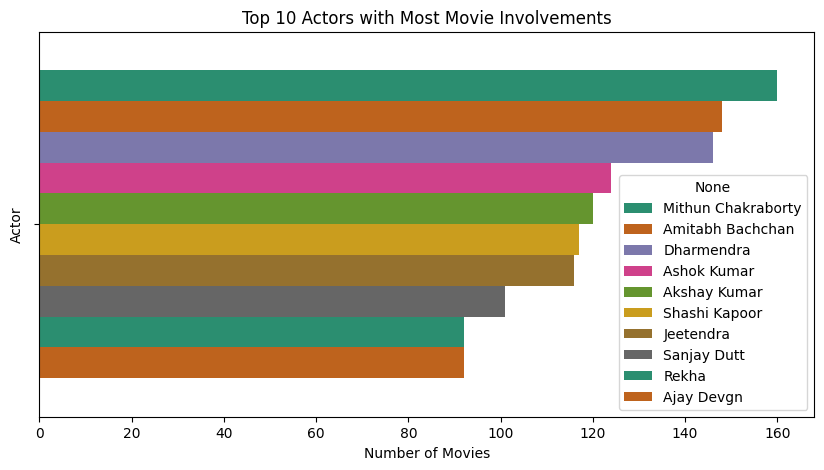

In [93]:

combined_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])

top_10_actors = combined_actors.value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, hue=top_10_actors.index, palette='Dark2')
plt.title('Top 10 Actors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()


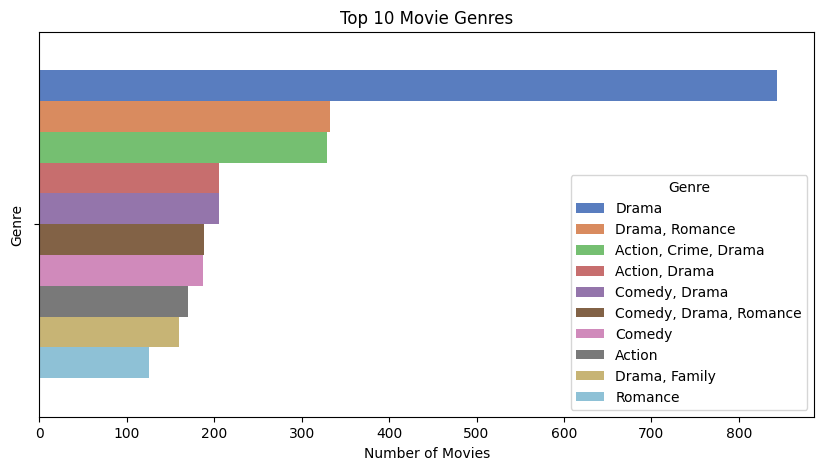

In [94]:
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, hue=top_10_genres.index,  palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

<Axes: >

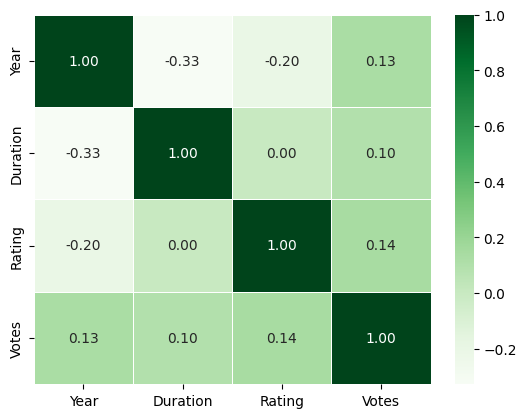

In [95]:

num_df=  df.drop(columns=['Name','Actor 1','Actor 2','Actor 3','Director','Genre'])
corr=num_df.corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap='Greens', fmt=".2f", linewidth=0.5)   

## 5. Feature Engineering

In [64]:
df= df.drop('Name',axis=1)

In [100]:
# Create new features 

Genre_Average_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] =Genre_Average_Rating

Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] =Director_Average_Rating

Actor1_Average_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Average_Rating'] =Actor1_Average_Rating

Actor2_Average_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Average_Rating'] =Actor2_Average_Rating

Actor3_Average_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Average_Rating'] =Actor3_Average_Rating

## 6. Data Splitting

In [101]:

Movie_features = ['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']
X = df[Movie_features]
y = df.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Model Building

In [102]:
#Building a Random Forest Model
Movie_model = RandomForestRegressor()
# Fitting the model to the training data
Movie_model.fit(X_train, y_train)

RandomForestRegressor()

## 8. Model Evaluation

In [103]:
y_pred_test = Movie_model.predict(X_test)

In [104]:
MSE_rf =  mean_squared_error(y_test, y_pred_test) 
MAE_rf = mean_absolute_error(y_test, y_pred_test)
R2_Score_rf = r2_score(y_test, y_pred_test)

print('\n   Performance Evaluation for Random Forest Model: ')
print('Mean squared error value is: ', MSE_rf)
print('Mean absolute error value is: ', MAE_rf)
print('R2 score value is: ', R2_Score_rf)


   Performance Evaluation for Random Forest Model: 
Mean squared error value is:  0.345591128975265
Mean absolute error value is:  0.40145583038869265
R2 score value is:  0.8133698853524873
